##### Data Source: https://www.kaggle.com/datasets/manchunhui/world-development-indicators

<h1 style="font-size:2em;color:blue">Visualization Assignement</h1>

<center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Global_North_and_Global_South.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/datasets/manchunhui/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

## Q0 Initial exploration of the Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#version of libs
print("matplotlib version : {0}".format(matplotlib.__version__))
print("pandas version : {0}".format(pd.__version__))
print("numpy version : {0}".format(np.__version__))

matplotlib version : 3.9.2
pandas version : 2.2.2
numpy version : 1.23.3


In [3]:
df = pd.read_csv('WDIData_T.csv')

In [4]:
#Show a number of rows and columns for WDIData_T.csv dataset
#---------------------------------------------
df.shape

(7578806, 6)

This is a really large dataset, at least in terms of the number of rows. Explain the meaning of data for each column.

In [5]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


In [6]:
#Explain
#-----------------------------------------------
# We have 6 columns:
# 1. Country Name is just a name of the country
# 2. CountryCode is just code of the country used for convenient representation
# 3. IndicatorName is the most interesting field - it has several indicators that shows countries performance
# 4. IndicatorCode is code representation of IndicatorName field which has several codes
# 5. Year is year
# 6. Value is amount/capacity of indicator

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578806 entries, 0 to 7578805
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 346.9+ MB


Looks like it has different indicators for different countries with the year and value of the indicator.

### Q1 How many UNIQUE country names are there ?

In [7]:
#----Write your code here-------------------------
df.CountryName.unique().shape


(263,)

### Q2 How many UNIQUE country codes are there ?

In [8]:
# How many unique country codes are there ? (should be the same #)
#Write your code here----------------------
df.CountryCode.unique().shape

(263,)

### Q3 How many unique indicators are there ?

In [9]:
# How many unique indicators are there ? (should be the same #)
#Write your code here---------------------
assert df.IndicatorName.unique().shape == df.IndicatorCode.unique().shape
df.IndicatorName.unique().shape


(1437,)

### Q4 How many years of data do we have ?

In [10]:
# How many years of data do we have ?
#------------
df.Year.unique().shape

(61,)

### Q5 What's the range of years?


In [11]:
#Write your code here------------
data = sorted(df.Year.unique())

data[0], data[-1]

(1960, 2020)

### Q6. Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA. Write a code to show CO2 emissions per capita from USA (Show only 5 records)

In [12]:
#Write a code to show CO2 emissions per capita from USA (Show only 5 records)
#-----------------------------------
mask = (df['IndicatorName'] == 'CO2 emissions (metric tons per capita)') & (df['CountryName'] == 'United States')

df[mask].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36242,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
78181,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
122451,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
166699,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
211426,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Q7 Let's see how emissions have changed over time using MatplotLib. Use visualization to show how CO2 Emission in USA have changed over time.


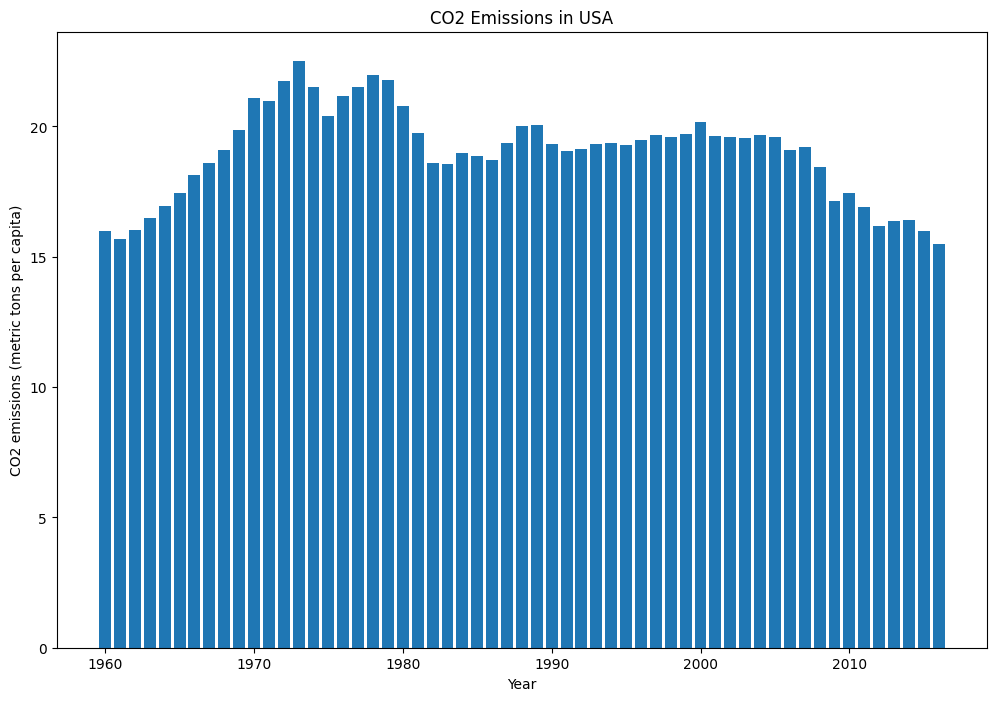

In [13]:
#Use visualization to show how CO2 Emission in USA have changed over time.
#----------------------------------
plt.figure(figsize=(12, 8))

plt.bar(df[mask].Year, df[mask].Value)
plt.title("CO2 Emissions in USA")
plt.xlabel("Year")
plt.ylabel("CO2 emissions (metric tons per capita)")

plt.show()

Expected Output:<br/>
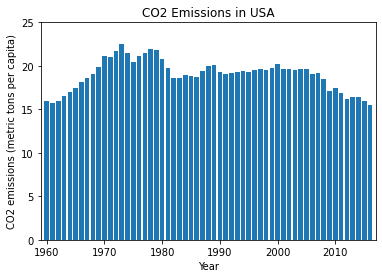

### Q8. Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it. Show the CO2 emissions in USA using line plot.

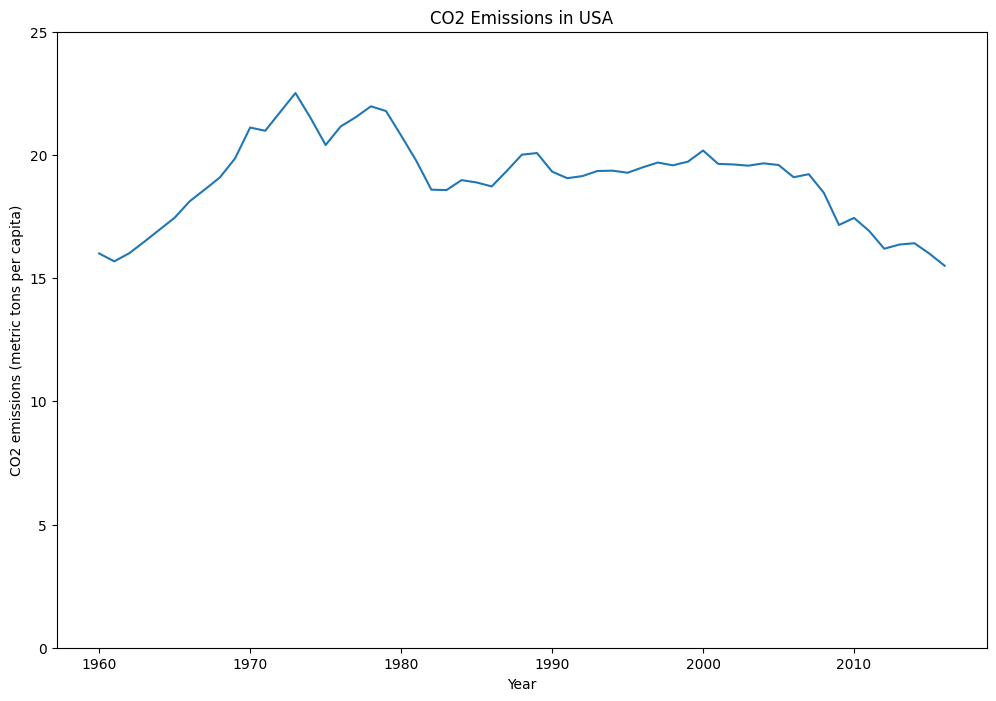

In [14]:
#Show the CO2 emissions in USA using line plot
#---------------------------------
plt.figure(figsize=(12, 8))

plt.plot(df[mask].Year, df[mask].Value)
plt.title("CO2 Emissions in USA")
plt.xlabel("Year")
plt.ylabel("CO2 emissions (metric tons per capita)")
plt.ylim(0, 25)

plt.show()

Guideline:<br/>
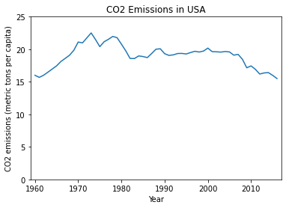

### Q9 Use Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. Write code to show the histogram of CO2 emission from USA

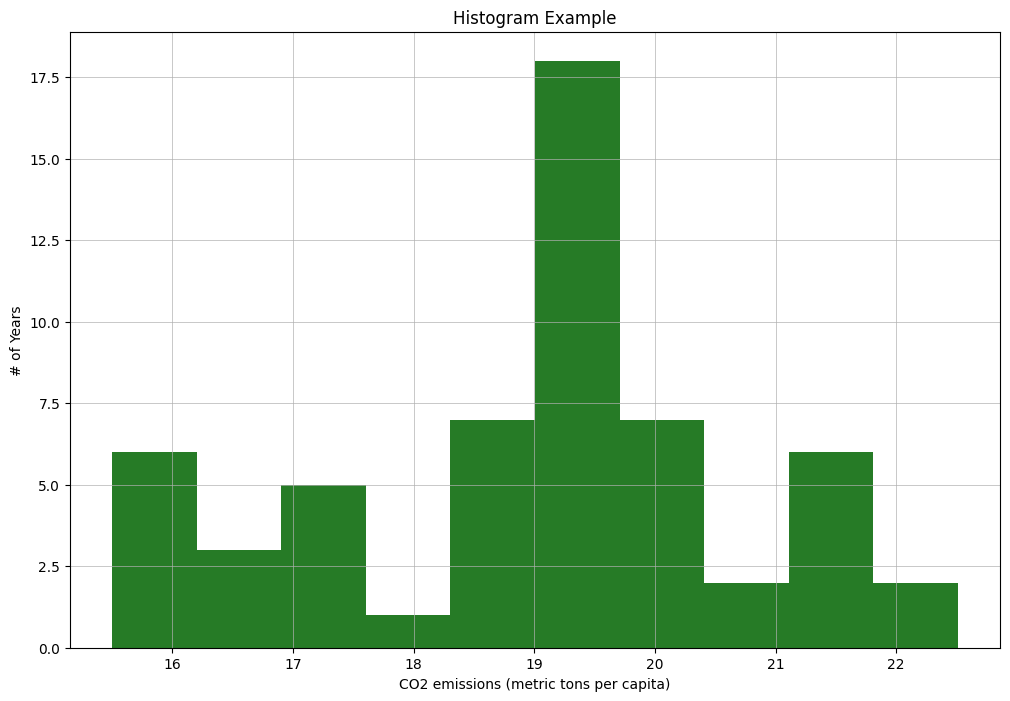

In [15]:
#Write code to show the histogram of CO2 emission from USA
#-------------------------------------------
plt.figure(figsize=(12, 8))

plt.hist(df[mask].Value, bins=10, color='darkgreen', alpha=0.85)

plt.grid(axis='both', linestyle='-', linewidth=0.7, alpha=0.7)

plt.title('Histogram Example')
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('# of Years')

plt.show()

Expected Result:<br/>
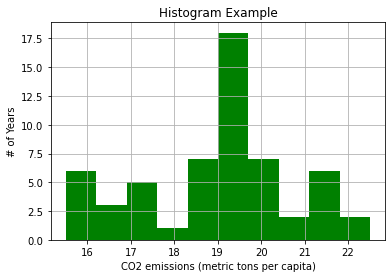

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### Q10. Use visualization to compare the USA's CO2 emission  to those from other countries in 2011?

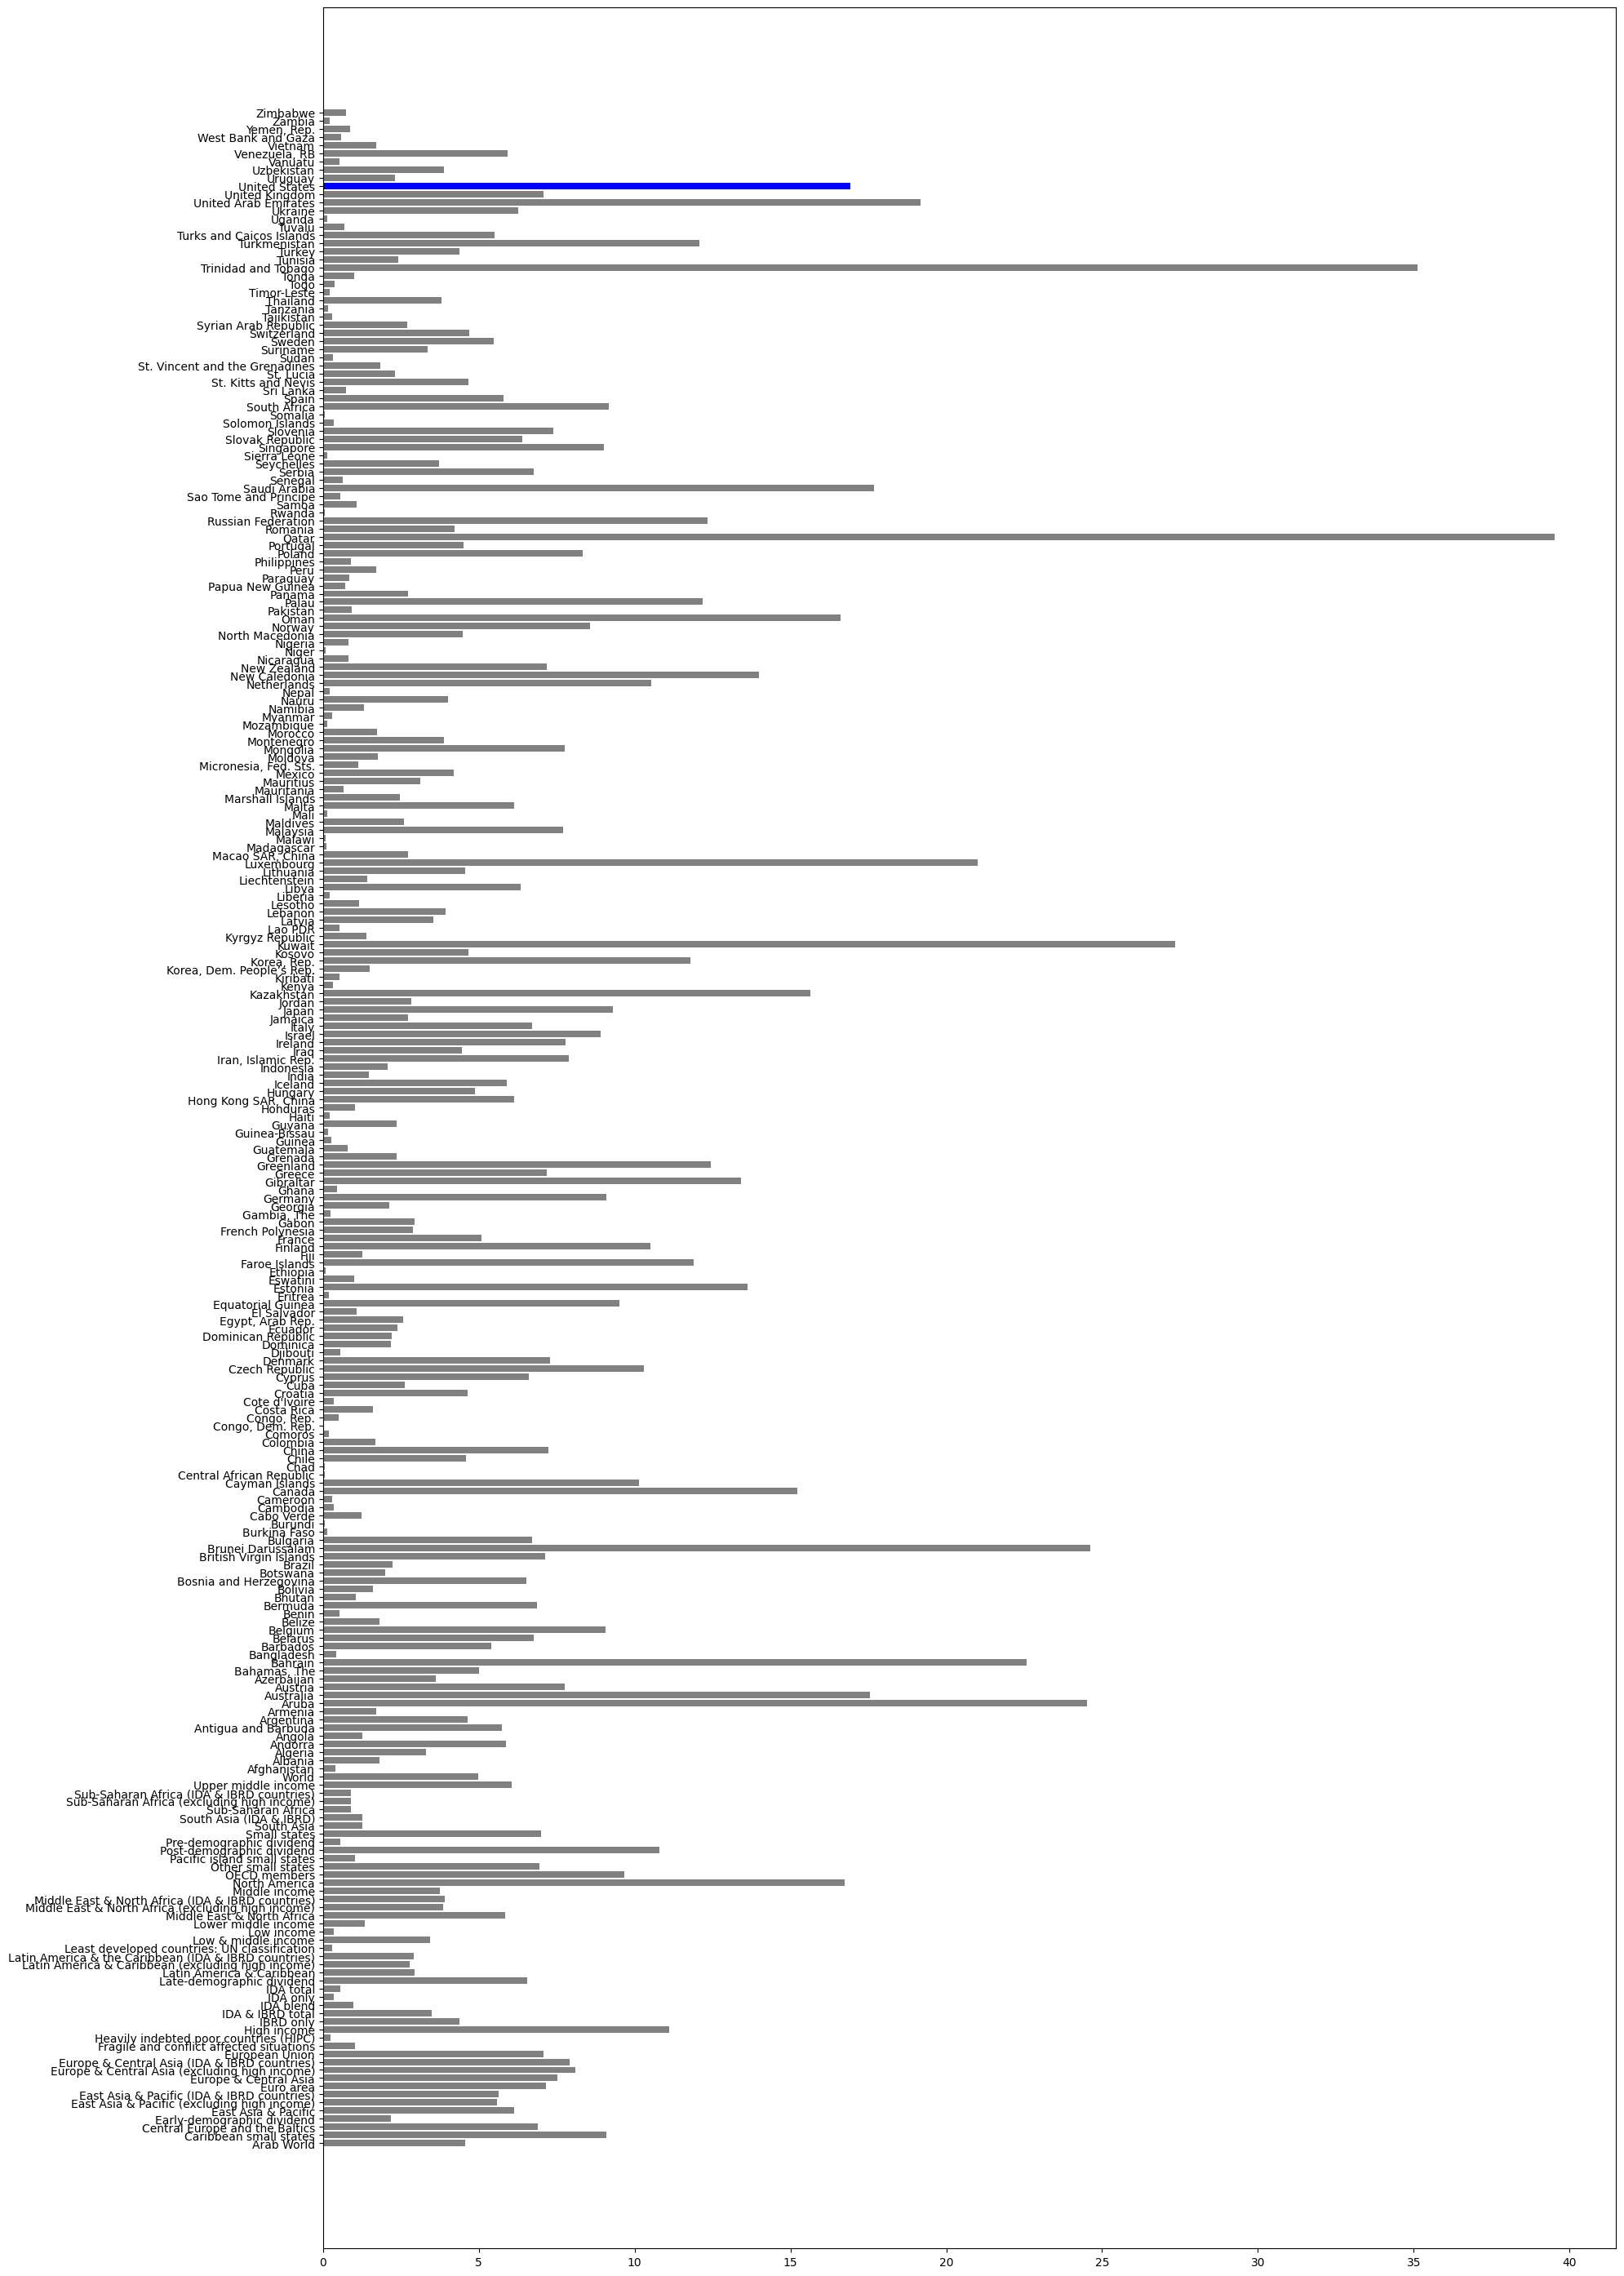

In [16]:
#Write your code here
#---------------------------------------
mask = (df['IndicatorName'] == 'CO2 emissions (metric tons per capita)') & (df['Year'] == 2011)

plt.figure(figsize=(20, 28))

plt.barh(df[mask].CountryName, df[mask].Value, color=['blue' if country == 'United States' else 'grey' for country in df[mask].CountryName])

plt.tight_layout()

For how many countries do we have CO2 per capita emissions data in 2011

In [17]:
#Write your code here---
df[mask].CountryName.size

250

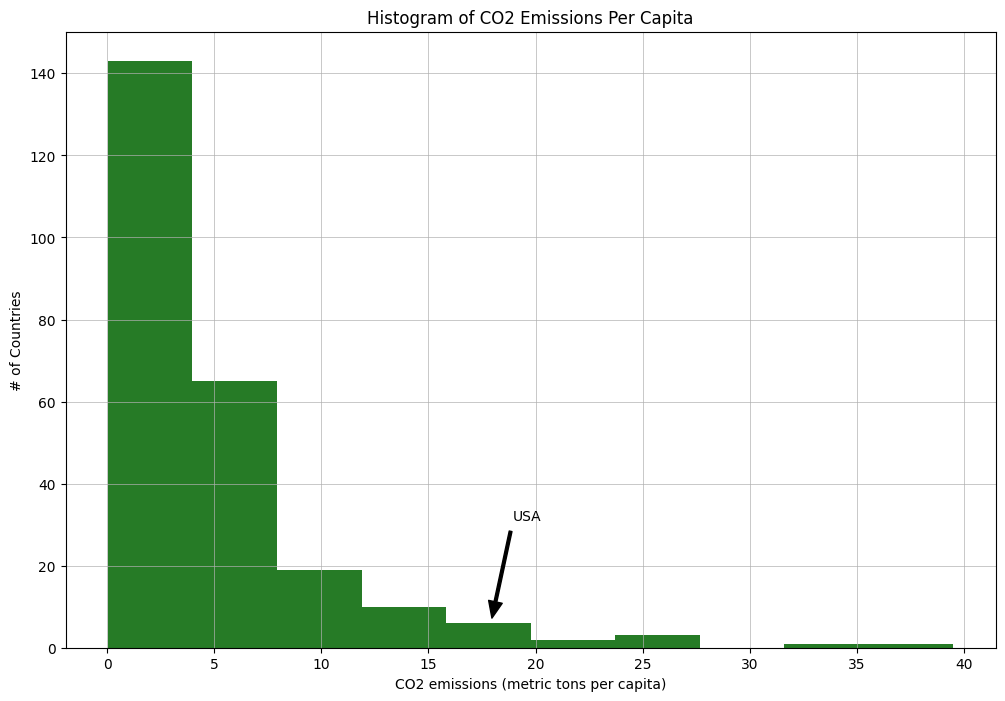

In [18]:
# let's plot a histogram of the emissions per capita by country
usa_value = df[(df['CountryName'] == 'United States') & (mask)]['Value'].values[0]

plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(df[mask].Value, bins=10, color='darkgreen', alpha=0.85)

bin_index = next(i for i, b in enumerate(bins) if b > usa_value) - 1
x_arrow = usa_value + 1
y_arrow = counts[bin_index]

plt.annotate(
    'USA', 
    xy=(x_arrow, counts[bin_index]), 
    xytext=(x_arrow + 1, counts[bin_index] + 25),
    arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=10)
)

plt.grid(axis='both', linestyle='-', linewidth=0.7, alpha=0.7)
plt.title('Histogram of CO2 Emissions Per Capita')
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('# of Countries')

plt.show()

Expected Result:<br/>
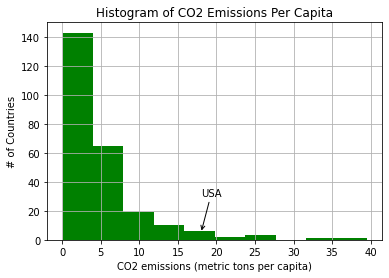

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

### Q11. Show a plot of GDP per capita of USA over time

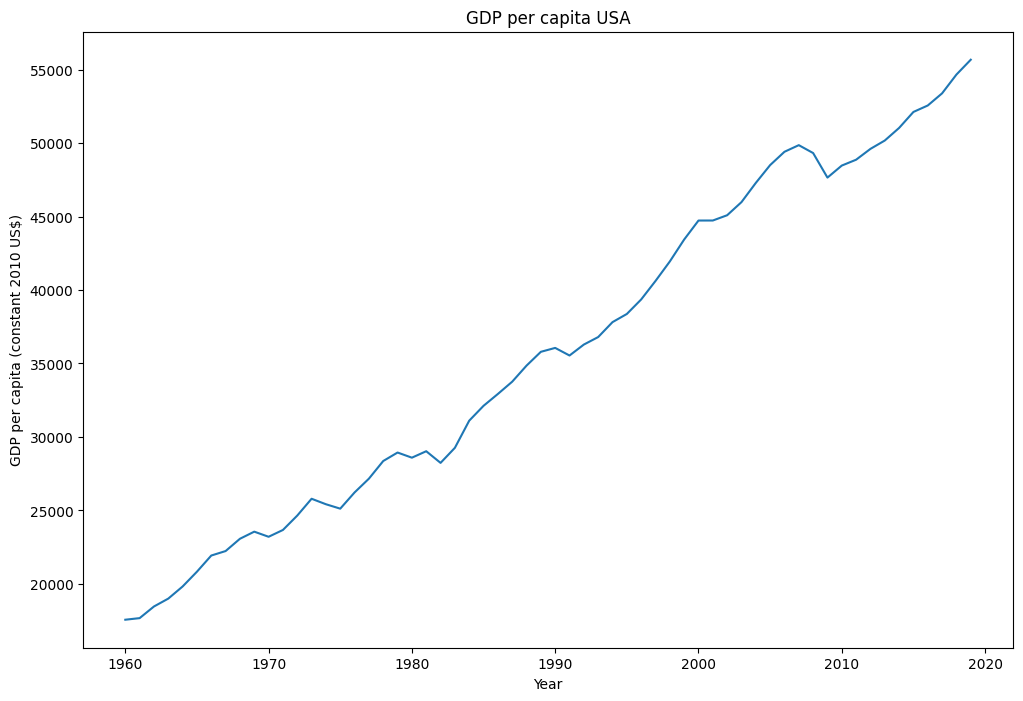

In [49]:
#Write your code here: hist_indicator = 'GDP per capita \(constant 2010'
#------------------------------------------
mask = (df['IndicatorName'] == 'GDP per capita (constant 2010 US$)') & (df['CountryName'] == 'United States')

plt.figure(figsize=(12, 8))


plt.plot(df[mask].Year, df[mask].Value)
plt.title("GDP per capita USA")
plt.xlabel("Year")
plt.ylabel("GDP per capita (constant 2010 US$)")

plt.show()

Expected Result:<br/>
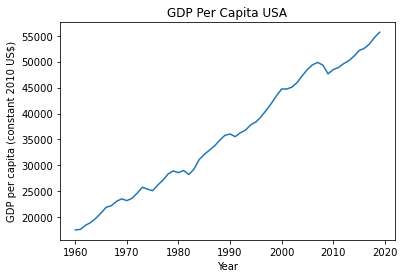

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### Q12. Use ScatterPlot for comparing GDP against CO2 emissions (per capita) for USA. Determine their correlation coefficient and justify results.

**Hint**: make sure that GDP and CO2 emissions are in the same time frames.

(57, 6) (57, 6)


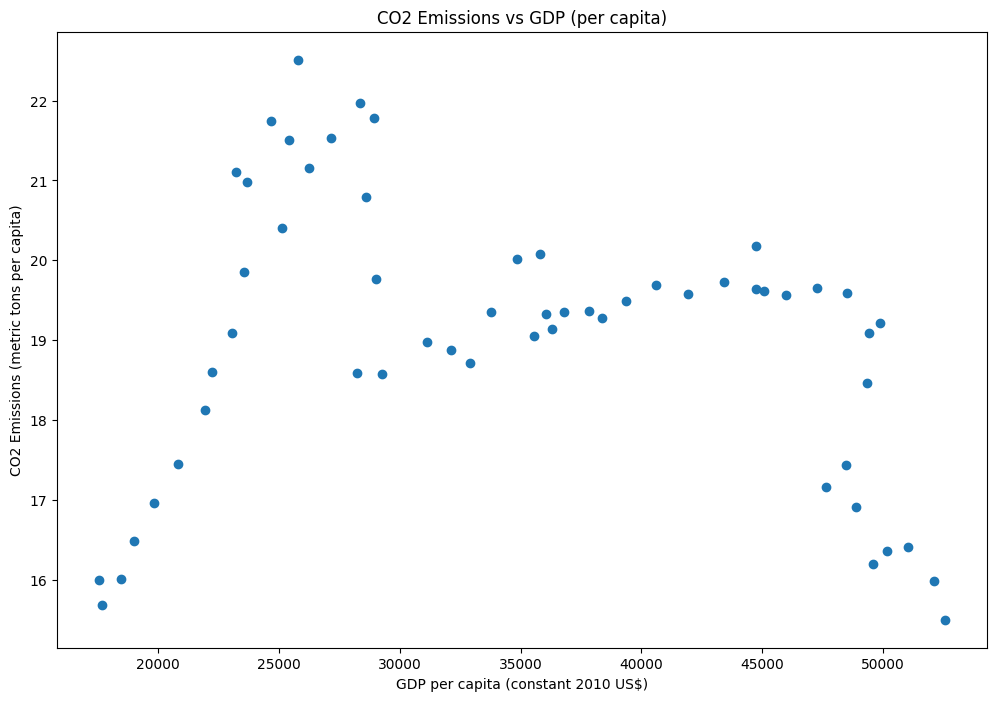

In [59]:
#Write your code her---
mask2 = (df['IndicatorName'] == 'CO2 emissions (metric tons per capita)') & (df['CountryName'] == 'United States')
mask1 = (df['IndicatorName'] == 'GDP per capita (constant 2010 US$)') & (df['CountryName'] == 'United States') & (df.Year.isin(df[mask2].Year))

print(df[mask1].shape, df[mask2].shape)

plt.figure(figsize=(12, 8))

plt.scatter(df[mask1].Value, df[mask2].Value)
plt.title("CO2 Emissions vs GDP (per capita)")
plt.xlabel("GDP per capita (constant 2010 US$)")
plt.ylabel("CO2 Emissions (metric tons per capita)")

plt.show()

Expected Result:<br/>
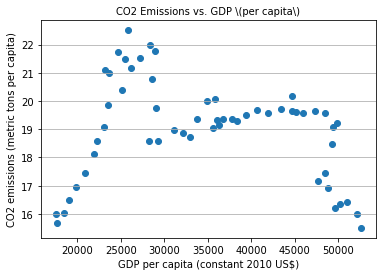

This graph looks like a light negative relationship. Determine the correlation coefficient between the GDP and CO2 emission. Justify results.

In [70]:
# Since both features in different distributions in terms of numerical value, I will bring them into the same scale, and then compute correlation coefficient
from sklearn.preprocessing import StandardScaler

gdp_values = df[mask1].Value.values.reshape(-1, 1)
co2_values = df[mask2].Value.values.reshape(-1, 1)

scaler = StandardScaler()

gdp_standardized = scaler.fit_transform(gdp_values)
co2_standardized = scaler.fit_transform(co2_values)

df_standardized = pd.DataFrame({
    'GDP': gdp_standardized.flatten(),
    'CO2': co2_standardized.flatten()
})

correlation_coefficient = df_standardized['GDP'].corr(df_standardized['CO2'])
correlation_coefficient

# -0.204 indicates that there are negative relationship between indicators (features)

-0.2045608691847724

### Q13. Pick one developing country from the dataset and try Q12. Compare results with those from Q12 and justify.

In [76]:
#Write your code ehre
mask1 = (df['IndicatorName'] == 'CO2 emissions (metric tons per capita)') & (df['CountryName'] == 'Uzbekistan')
mask2 = (df['IndicatorName'] == 'GDP per capita (constant 2010 US$)') & (df['CountryName'] == 'Uzbekistan') & (df.Year.isin(df[mask1].Year))

# df[mask1].shape, df[mask2].shape
# ((25, 6), (33, 6)) - without adding year constraints for both

gdp_values = df[mask1].Value.values.reshape(-1, 1)
co2_values = df[mask2].Value.values.reshape(-1, 1)

scaler = StandardScaler()

gdp_standardized = scaler.fit_transform(gdp_values)
co2_standardized = scaler.fit_transform(co2_values)

df_standardized = pd.DataFrame({
    'GDP': gdp_standardized.flatten(),
    'CO2': co2_standardized.flatten()
})

correlation_coefficient = df_standardized['GDP'].corr(df_standardized['CO2'])
correlation_coefficient

-0.925685138836253

So, for Uzbekistan the correlation coefficient between GDP and CO2 is -0.925 which is strong negative relationship that means two variables have a significant inverse association. For US, it is -0.204 - which is moderate negative relationship.

For Uzbekistan, I think it is true, since it is developing country in terms of last 2 decades, while US has been leading country for many decades (centuries).